## Document Classification

In this example, we will train a classifier model to classify newsgroup posts into one of 20 categories


In [1]:
# imports
import nlprep_utilities  # our custom module for pre-processing data
from sklearn.datasets import fetch_20newsgroups

# import for bag of words and naive bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Downloading the data 
# NOTE: this can take a few minutes when run for the first time
data_train = fetch_20newsgroups(subset="train")
data_test = fetch_20newsgroups(subset="test")

### Exploratory Data Analysis


In [3]:
# Let's check the type of data_train
type(data_train)

sklearn.utils._bunch.Bunch

This is of type `sklearn.utils.Bunch`. It is a Python dictionary-like object where you can access keys as attributes


In [4]:
data_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
# Check the keys of data_train
data_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
# Print the description of data_train
print(data_train["DESCR"])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

Here, we are interested in the 'data', 'target_names' and 'target' keys. The 'data' key contains the actual data (different newsgroup posts), the 'target_names' key contains the 20 categories of posts, and the 'target' key contains the categories indexed from 0 to 19.


In [7]:
# Get the number of observations in the train data
len(data_train["data"])

11314

In [8]:
# Get the number of observations in the test data
len(data_test["data"])

7532

In [9]:
# Getting the target names (or classes) and the total number of classes from the data
data_train["target_names"]

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
# Look at a single (zero-th) observation
print(data_train["data"][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [11]:
# Print the target for this observation
data_train["target"][0]
# 7th in the list of data_train["target_names"]

7

In [12]:
# Print the target name for the same observation
data_train["target_names"][data_train["target"][0]]

'rec.autos'

### Text pre-processing


Here, we will be making use of the `process_text` function from `nlprep_utilities` module to pre-process all the observations in the train and test sets


In [13]:
print(data_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [14]:
# Test the process_text function on one observation as an example
nlprep_utilities.process_text(data_train.data[0])

'lerxst wam umd edu thing subject car nntp posting host rac3 wam umd edu organization university maryland college park line 15 wondering anyone could enlighten car saw day 2 door sport car looked late 60 early 70 called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst'

In [15]:
type(data_train.data)


list

In [16]:
# Pre-process the entire train and test set and store them as X_train and X_test
# NOTE: this will take about a minute or so to run
X_train = [nlprep_utilities.process_text(document) for document in data_train.data]
X_test = [nlprep_utilities.process_text(document) for document in data_test.data]

In [17]:
# Let's check one output to make sure it is the same as the above
print(X_train[0])

lerxst wam umd edu thing subject car nntp posting host rac3 wam umd edu organization university maryland college park line 15 wondering anyone could enlighten car saw day 2 door sport car looked late 60 early 70 called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please e mail thanks il brought neighborhood lerxst


In [18]:
type(X_train)

list

### Feature Extraction

We will use the bag of words to get a term frequency matrix for our datasets


In [19]:
# Creating a Count Vectorizer object cv
# TYPE YOUR CODE HERE

cv = CountVectorizer()

In [21]:
# We fit the vectorizer on the train data and transform it. scikit-learn provides a fit_transform() method that combines the .fit() and the .transform() steps
# We call this transformed data as Xt_train

# Call the fit method on X_train
cv.fit(X_train)
# Call the transform method on X_train and store the output as Xt_train
# TYPE YOUR CODE HERE
Xt_train = cv.transform(X_train)

In [22]:
len(cv.get_feature_names_out())

120164

In [23]:
# For the test data X_test, we only do the transformation without fitting the model again.
# TYPE YOUR CODE HERE

Xt_test = cv.transform(X_test)

In [24]:
# Create y_train and y_test from the values corresponding to the 'target' key in data_train and data_test
y_train = data_train.target
y_test = data_test.target

In [25]:
# Printing the shape for Xt_train, Xt_test, y_train, y_test
print(f"{Xt_train.shape = }")
print(f"{Xt_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

Xt_train.shape = (11314, 120164)
Xt_test.shape = (7532, 120164)
y_train.shape = (11314,)
y_test.shape = (7532,)


### Modelling

Here, we will train a Random Forest classifier


In [26]:
# Create a model object of this Random Forest classifier
# TYPE YOUR CODE HERE

model = RandomForestClassifier()

In [27]:
# Fit the Random Forest model on Xt_train and y_train
# TYPE YOUR CODE HERE
# NOTE: This can take a couple of minutes to run
model.fit(Xt_train, y_train)

RandomForestClassifier()

In [28]:
# Make the predictions on the test set Xt_test to get y_pred
# TYPE YOUR CODE HERE

y_pred = model.predict(Xt_test)

In [29]:
# Check the shape of y_pred (y_pred should have the same shape as y_test)
y_pred.shape

(7532,)

In [30]:
# Import the accuracy_score, confusion_matrix and ConfusionMatrixDisplay from sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [31]:
# Print the accuracy score on the test set predictions by comparing with the actual values
print(accuracy_score(y_test, y_pred))

0.782793414763675


Plot the confusion matrix


In [35]:
# Import matplotlib.pyplot to plot the confusion matrix
import matplotlib.pyplot as plt

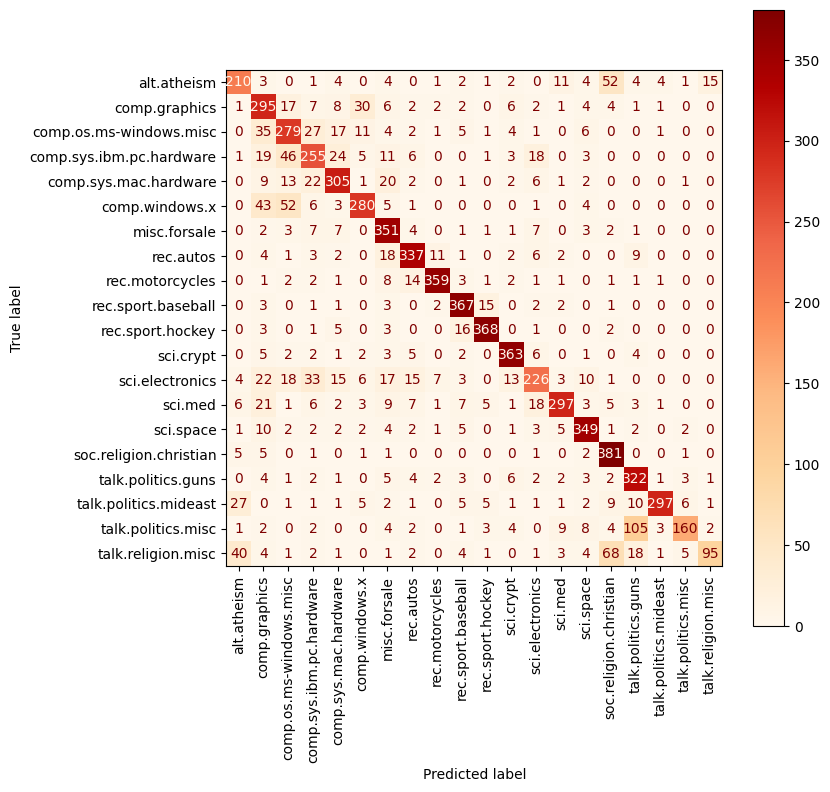

In [36]:
# Plot the confusion matrix
# xticks_rotation argument allows us to rotate the xtick labels so that they don't overlap
# display_labels argument sets the names of the categories in the matrix instead of numbers 0...19.
fig, ax = plt.subplots(figsize=(8, 8))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    ax=ax,
    cmap="OrRd",
    display_labels=data_train.target_names,
    xticks_rotation="vertical",
)